Running deterministic QuickSelect (Median of Medians with Insertion Sort)...

n = 100      | avg runtime = 83403 ns | median runtime = 79642 ns
n = 200      | avg runtime = 157055 ns | median runtime = 153402 ns
n = 500      | avg runtime = 466577 ns | median runtime = 392519 ns
n = 1000     | avg runtime = 1282188 ns | median runtime = 821026 ns
n = 2000     | avg runtime = 1476229 ns | median runtime = 1500738 ns
n = 5000     | avg runtime = 3981312 ns | median runtime = 3590659 ns
n = 10000    | avg runtime = 7330468 ns | median runtime = 7263688 ns
n = 20000    | avg runtime = 30425537 ns | median runtime = 16113215 ns
n = 50000    | avg runtime = 55590052 ns | median runtime = 46107812 ns
n = 100000   | avg runtime = 127043465 ns | median runtime = 148824268 ns
n = 200000   | avg runtime = 346747434 ns | median runtime = 388850953 ns
n = 500000   | avg runtime = 775296203 ns | median runtime = 766740325 ns
n = 1000000  | avg runtime = 1708140628 ns | median runtime = 1594108822 ns

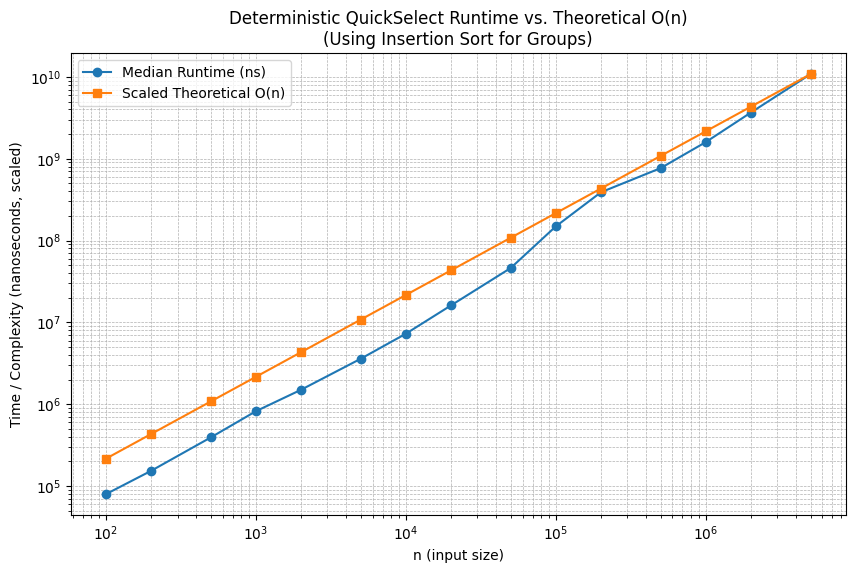

In [ ]:
import random
import time
import statistics
import matplotlib.pyplot as plt
import numpy as np


# Insertion sort is used to sort the group of 5 elements that we have
# it will take constant time as elements are a constant number
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


def median_of_medians(arr):
    if len(arr) <= 5:
        return insertion_sort(arr)[len(arr) // 2] # Base case i.e if length of array becomes less than or equal to 5 we
                                                  # can directly use insertion sort as it will be constant time operation and return the median

    groups = [arr[i:i+5] for i in range(0, len(arr), 5)] #divide array into groups of 5 elements

    medians = [insertion_sort(group)[len(group)//2] for group in groups] # Find medians of each group using insertion sort

    return median_of_medians(medians) # Recursively find medians of median


def deterministic_quickselect(arr, k):
    if len(arr) == 1:
        return arr[0] #If array has only one element than we would return that as it would be the
                      #minimum or the maximum in this case

    pivot = median_of_medians(arr) # here using medians of median we find a pivot which is good and
                                   # this gurantees that our pivot slection is approximately true median

    #In these steps we divide arrays in 3 groups
    lows = [x for x in arr if x < pivot] #lows = elements smaller than the pivot
    highs = [x for x in arr if x > pivot] # highs = elements greater than the pivot
    pivots = [x for x in arr if x == pivot] # pivot = elements equal to the pivot


    if k <= len(lows): #if there are more than k elements smaller than pivot
        return deterministic_quickselect(lows, k) # k-th smallest should be in lows arrays so recursively call the function for lows again
    elif k <= len(lows) + len(pivots):# if k lies between length of lows and pivots
        return pivot # we can directly return pivot as the k-th smallest element
    else: # or if k is larger than both lows and pivots
        return deterministic_quickselect(highs, k - len(lows) - len(pivots)) # than the desired number lies in the highs
                                                                             # we substract len(lows) and len(pivots) as we have already passed them
                                                                             # and we will call function for the new highs array


def run_case(n: int, k: int = None) -> int:
    if k is None:
        k = n // 2 #if k is not passed we return the median of the array

    arr = [random.randint(1, 10**6) for _ in range(n)] # generating a random array of size n with elements in the
                                                       # the specified range

    start = time.perf_counter_ns() # starting the time counter in nanoseconds
    deterministic_quickselect(arr, k) # calling the quickselect function
    end = time.perf_counter_ns() # stopping the time counter

    return end - start # this would return the time taken for the function to complete its execution



def main():
    test_n = [
        100, 200, 500, 1000, 2000, 5000,
        10000, 20000, 50000, 100000,
        200000, 500000, 1000000, 2000000, 5000000
    ] # n's or the length of arrays we are going to run the program for

    R = 5  # repetitions per n: for every value of n we run our program n times to get the median and average runtime

    avg_times = []
    median_times = []

    print("Running deterministic QuickSelect (Median of Medians with Insertion Sort)...\n")

    for n in test_n:
        times = [run_case(n) for _ in range(R)] # running for length of array n
        avg = statistics.mean(times) # calculating avg runtime
        median = statistics.median(times) # median runtime
        avg_times.append(avg) # storing in array
        median_times.append(median)
        print(f"n = {n:<8} | avg runtime = {avg:.0f} ns | median runtime = {median:.0f} ns")

    # Finding the scaled theoretical complexity of the program: Theoretical Complexity = O(n)
    theoretical = [n for n in test_n]
    scale_factor = max(median_times) / max(theoretical) #scaling constant
    scaled_theoretical = [x * scale_factor for x in theoretical] # scaled_values

    #Plotting the graph between theoretical and practical runtime of the problem
    plt.figure(figsize=(10, 6))
    plt.plot(test_n, median_times, "o-", label="Median Runtime (ns)")
    plt.plot(test_n, scaled_theoretical, "s-", label="Scaled Theoretical O(n)")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("n (input size)")
    plt.ylabel("Time / Complexity (nanoseconds, scaled)")
    plt.title("Deterministic QuickSelect Runtime vs. Theoretical O(n)\n(Using Insertion Sort for Groups)")
    plt.legend()
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()


if __name__ == "__main__":
    main()
